# Task 1: Prediction using Supervised ML
## By:Syed Nadeem Haque
### Problem Statement
● Predict the percentage of an student based on the no. of study hours.<br>
● This is a simple linear  regression task as it involves just 2 variables.<br>
● What will be predicted score if a student studies for 9.25 hrs/ day? 


In [1]:
# Importing all libraries required
# supress Warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 1: Data Cleaning

In [3]:
# inspecting the Dataframe
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(25, 2)
Index(['Hours', 'Scores'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


##### ``1 There are total 25 rows and 2 column in the dataset.
##### ``2 The column names are "Hours" & "Scores".
##### ``3 Hours column is float datatype while Scores is int datatype.
##### ``4 Hours column have got mean of 5.01, max 9.2 and min 1.1 & Scores column have got mean of 51.48, max 95 and min 17.

In [4]:
# finding the sum of Null values in the Dataframe
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Hours     0
Scores    0
dtype: int64
False
0


##### There are no missing values in the dataset

### Step 2: EDA

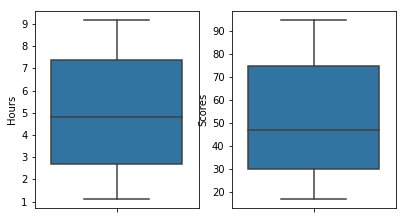

In [5]:
# Boxplot to see if there are any unusual data and also to check outliers
plt.figure(figsize=(10, 8))
plt.subplot(2,3,1)
sns.boxplot(y = 'Hours',data = df)
plt.subplot(2,3,2)
sns.boxplot(y = 'Scores', data = df)
plt.show()

##### There are no outliers in the dataset and also the datas looks normal

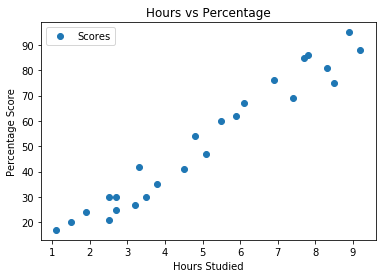

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score & the general trend is that the more hour one studies, the more the person is likely to score higher marks.

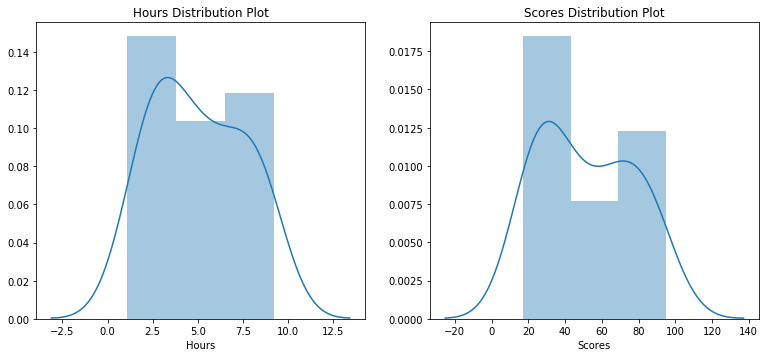

In [7]:
# Distribution plot of the attributes 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title('Hours Distribution Plot') 
sns.distplot(df['Hours'])
plt.subplot(2,3,2)
plt.title('Scores Distribution Plot')
sns.distplot(df['Scores'])
plt.show()

##### From the distribution plot above we can observe that both Hours and Scores are evenly distributed there is no skewness in the data.

### Step 3: Model Building

#### Preparing the data

In [8]:
# Dividing the data into dependent and independent variable
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [9]:
# Spliting the data into train and test dataset
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

#### Training the Model

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


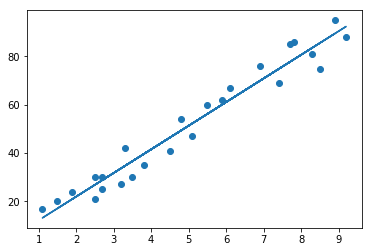

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making Prediction

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [14]:
# What will be predicted score if a student studies for 9.25 hrs/ day? 
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


#### Evaluating the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('r2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.4197278080276545
r2: 0.9568211104435257


#### Conclusion
##### `` 1. Mean Absolute Error is 4.41 and r2 value is 95% thus it can be said as the model is doing fine.
##### `` 2. Predicted score if a student studies for 9.25 hrs/ day is 92.92. 

### Thank You